In [2]:
from datetime import datetime
from unittest.mock import inplace

import kagglehub
import pandas as pd# Importar as libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("unicorns till sep 2022.csv")
df.shape

(1186, 7)

In [4]:
df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [5]:
df.rename( columns={
    'Unnamed: 0' : 'Id',
    'Company' : 'Empresa',
    'Valuation ($B)' : 'Valor ($B)',
    'Date Joined' : 'Data de Adesão',
    'Country' : 'Pais',
    'City ' : 'Cidade',
    'Industry': 'Setor',
    'Investors': 'Investidores',
}, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Empresa         1186 non-null   object
 1   Valor ($B)      1186 non-null   object
 2   Data de Adesão  1186 non-null   object
 3   Pais            1186 non-null   object
 4   Cidade          1186 non-null   object
 5   Setor           1186 non-null   object
 6   Investidores    1168 non-null   object
dtypes: object(7)
memory usage: 65.0+ KB


In [7]:
df.isnull().sum()

Empresa            0
Valor ($B)         0
Data de Adesão     0
Pais               0
Cidade             0
Setor              0
Investidores      18
dtype: int64

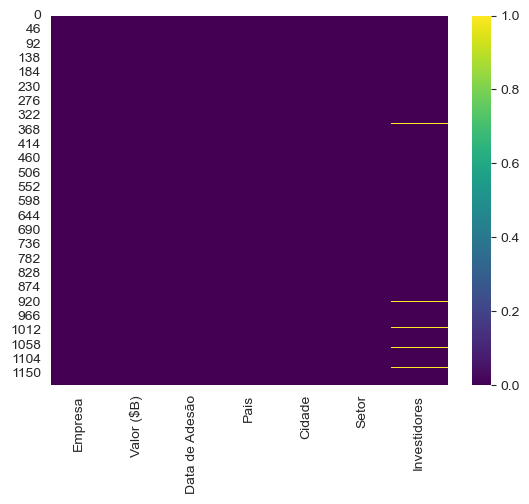

In [8]:
sns.heatmap(df.isnull(), cmap='viridis');

In [9]:
from collections import Counter
df.nunique()


Empresa           1183
Valor ($B)         222
Data de Adesão     695
Pais                48
Cidade             286
Setor               34
Investidores      1152
dtype: int64

In [10]:
df_proporção = df["Setor"].value_counts(normalize=True) * 100
df_proporção = df_proporção.round(2)
df_proporção


Setor
Fintech                                                               20.15
Internet software & services                                          18.89
E-commerce & direct-to-consumer                                        8.68
Health                                                                 7.93
Artificial intelligence                                                6.24
Supply chain, logistics, & delivery                                    5.48
Other                                                                  5.48
Cybersecurity                                                          4.89
Data management & analytics                                            3.79
Auto & transportation                                                  3.37
Hardware                                                               3.20
Mobile & telecommunications                                            3.12
Edtech                                                                 2.70
Consum

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33],
 [Text(0, 0, 'Fintech'),
  Text(1, 0, 'Internet software & services'),
  Text(2, 0, 'E-commerce & direct-to-consumer'),
  Text(3, 0, 'Health'),
  Text(4, 0, 'Artificial intelligence'),
  Text(5, 0, 'Supply chain, logistics, & delivery'),
  Text(6, 0, 'Other'),
  Text(7, 0, 'Cybersecurity'),
  Text(8, 0, 'Data management & analytics'),
  Text(9, 0, 'Auto & transportation'),
  Text(10, 0, 'Hardware'),
  Text(11, 0, 'Mobile & telecommunications'),
  Text(12, 0, 'Edtech'),
  Text(13, 0, 'Consumer & retail'),
  Text(14, 0, 'Travel'),
  Text(15, 0, 'Artificial Intelligence'),
  Text(16, 0, 'Internet'),
  Text(17, 0, 'Sequoia Capital China, ING, Alibaba Entrepreneurs Fund'),
  Text(18, 0, 'Andreessen Horowitz, DST Global, IDG Capital'),
  Text(19, 0, "B Capital Group, Monk's Hill Ventures, Dynamic Par

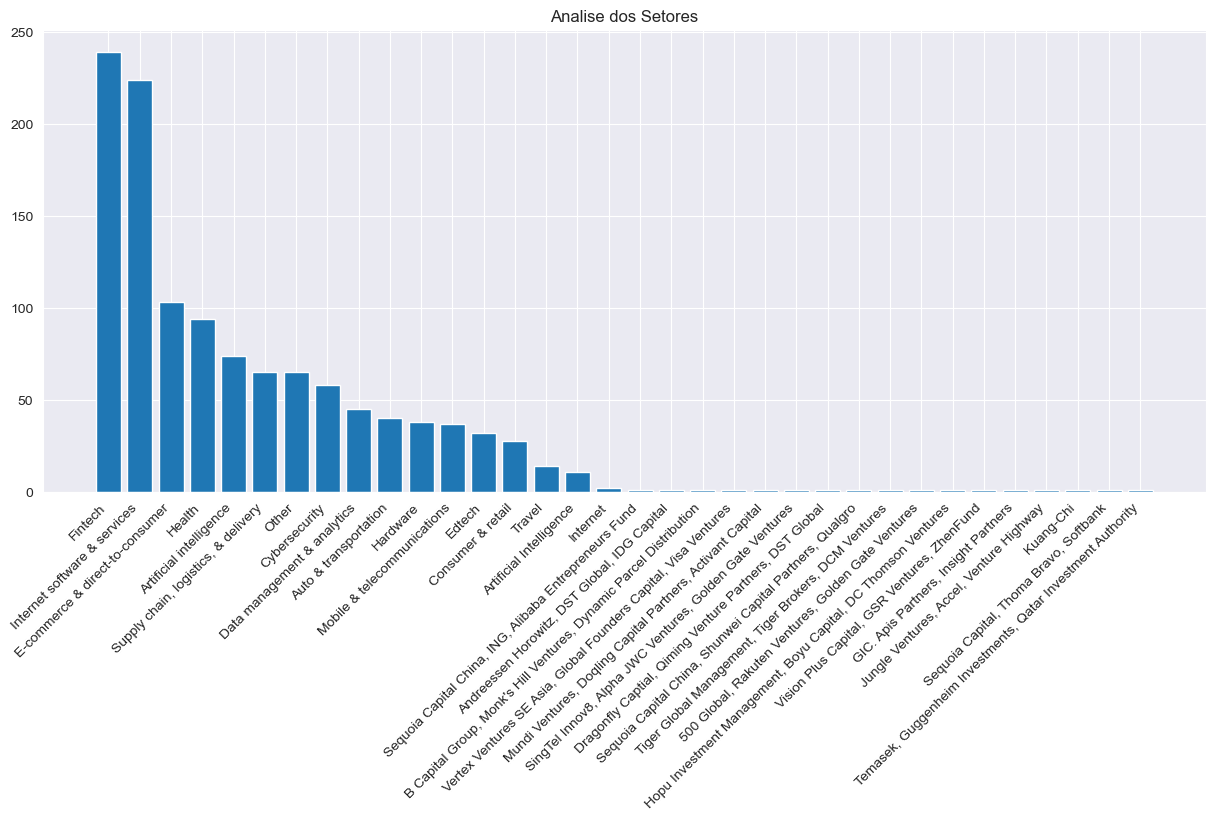

In [11]:
plt.figure(figsize=(15,6))
plt.title("Analise dos Setores")
plt.bar(df["Setor"].value_counts().index,df["Setor"].value_counts())
plt.xticks(rotation=45,ha='right');

In [12]:
Analise = df["Pais"].value_counts(normalize=True) * 100


In [13]:
Analise.round(2)

Pais
United States           53.63
China                   14.67
India                    5.90
United Kingdom           3.88
Germany                  2.45
France                   2.02
Israel                   1.85
Canada                   1.60
Brazil                   1.43
South Korea              1.43
Singapore                1.10
Sweden                   0.67
Mexico                   0.67
Australia                0.67
Indonesia                0.59
Netherlands              0.59
Hong Kong                0.59
Ireland                  0.51
Japan                    0.51
Switzerland              0.51
Norway                   0.42
Finland                  0.34
Spain                    0.34
Turkey                   0.25
Colombia                 0.25
Belgium                  0.25
United Arab Emirates     0.25
Austria                  0.17
Lithuania                0.17
Vietnam                  0.17
Thailand                 0.17
Estonia                  0.17
Chile                    0.17
Denma

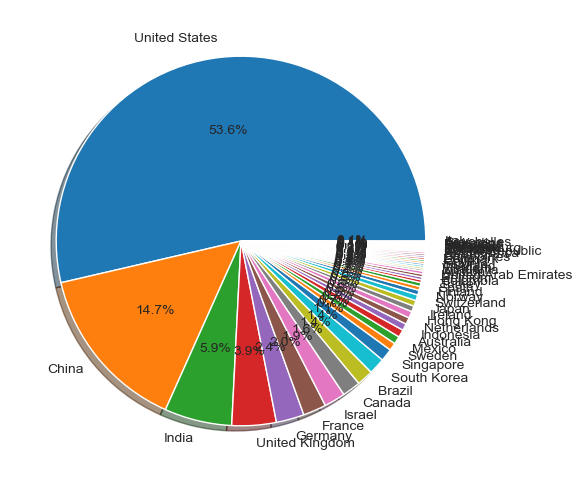

In [20]:
plt.figure(figsize=(15,6))

plt.pie(
    Analise,
    labels=Analise.index,
    autopct='%1.1f%%',
    shadow=True,

);

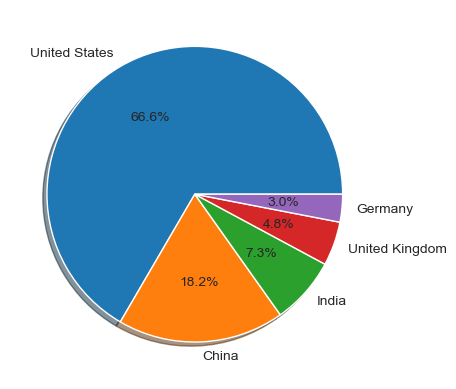

In [24]:
plt.pie(
    Analise.head(5),
    labels=Analise.index[0:5],
    autopct='%1.1f%%',
    shadow=True,

);

In [27]:
df["Data de Adesão"] = pd.to_datetime(df["Data de Adesão"])

In [37]:
df["Mês"] = pd.DatetimeIndex(df["Data de Adesão"]).month
df["Ano"] = pd.DatetimeIndex(df["Data de Adesão"]).year
df["Ano"]

0       2017
1       2012
2       2018
3       2014
4       2018
        ... 
1181    2022
1182    2022
1183    2022
1184    2022
1185    2022
Name: Ano, Length: 1186, dtype: int32

In [51]:
df["Id"] = df.index

In [71]:
analise_agrupada = df.groupby(by=["Pais","Ano","Mês","Empresa"]).count()["Id"].reset_index()
analise_agrupada.loc[(analise_agrupada["Pais"] == "Brazil") & (analise_agrupada["Ano"] >= 2020) ]

,Pais,Ano,Mês,Empresa,Id
22,Brazil,2020,1,Loft,1
23,Brazil,2020,12,C6 Bank,1
24,Brazil,2020,12,Creditas,1
25,Brazil,2021,1,MadeiraMadeira,1
26,Brazil,2021,8,Nuvemshop,1
27,Brazil,2021,8,Unico,1
28,Brazil,2021,9,CloudWalk,1
29,Brazil,2021,10,CargoX,1
30,Brazil,2021,12,Olist,1
31,Brazil,2022,2,Neon,1


In [85]:

df["Valor ($B)"] = pd.to_numeric(df["Valor ($B)"].apply(lambda x: x.replace("$"," ")))



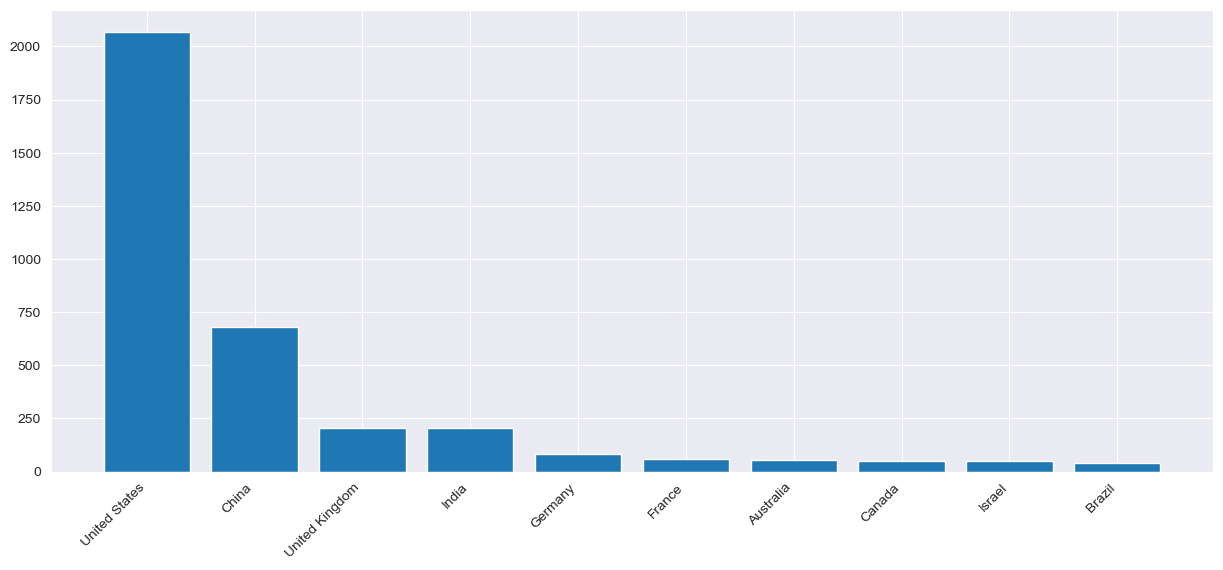

In [119]:
analise_pais = df.groupby("Pais")["Valor ($B)"].sum().reset_index().sort_values(by="Valor ($B)", ascending=False)
plt.figure(figsize=(15,6))

plt.bar(analise_pais["Pais"].head(10), analise_pais["Valor ($B)"].head(10))
plt.xticks(rotation=45,ha='right');
